## LP Optimization

In [1]:
# import Glop package
from ortools.linear_solver import pywraplp as glp
import lptools as lpt

In [2]:
#Create LP model object
mymodel = glp.Solver('Veerman',glp.Solver.GLOP_LINEAR_PROGRAMMING)

In [6]:
inf = mymodel.infinity()

variables = {'Chairs': (0, inf,15),    # (lower bound, upper bound, objective coefficient)
             'Desks': (0 , inf, 24),
             'Tables': (0, inf, 18)}

constraints = {'Fabrication': (-inf, 1850, [4, 6, 2]),    # (lower bound, upper bound, coefficient list)
               'Assembly': (-inf, 2400, [3, 5, 7]),
               'Shipping': (-inf, 1500, [3, 2, 4]),
               'Chair_mkt': (-inf, 360, [1, 0, 0]),
               'Desk_mkt': (-inf, 300, [0, 1, 0]),
               'Table_mkt': (-inf, 100, [0, 0, 1])}

In [7]:
mymodel.Objective().SetMaximization()
for v in variables:
    #print(v)
    #print(variables[v])
    (lb,ub,c) = variables[v]
    var = mymodel.NumVar(lb,ub,v)
    mymodel.Objective().SetCoefficient(var,c)

In [8]:
for c in constraints:
    (lb,ub,coeff_lst) = constraints[c]
    #print(list(zip(mymodel.variables(),coeff_lst)))
    constr = mymodel.Constraint(lb,ub,c)
    for (v,coeff) in zip(mymodel.variables(),coeff_lst):
        constr.SetCoefficient(v,coeff)

In [9]:
lpt.print_model(mymodel)

Variables:
Chairs, Desks, Tables 

maximize: 15.0*Chairs + 24.0*Desks + 18.0*Tables 

Subject To:
Fabrication: 4.0*Chairs + 6.0*Desks + 2.0*Tables <= 1850.0
Assembly: 3.0*Chairs + 5.0*Desks + 7.0*Tables <= 2400.0
Shipping: 3.0*Chairs + 2.0*Desks + 4.0*Tables <= 1500.0
Chair_mkt: 1.0*Chairs <= 360.0
Desk_mkt: 1.0*Desks <= 300.0
Table_mkt: 1.0*Tables <= 100.0

Bounds:
Chairs >= 0.0
Desks >= 0.0
Tables >= 0.0


In [10]:
#solve model and display results
status = mymodel.Solve()
print('Solution Status =',status)
print('Optimal Value = %.2f' % mymodel.Objective().Value())
for v in mymodel.variables():
    print('%s = %.2f' % (v.name(),v.solution_value()))

Solution Status = 0
Optimal Value = 8400.00
Chairs = 0.00
Desks = 275.00
Tables = 100.00


In [11]:
# display variable information
print('Variable    LB   Value    UB   Reduced Cost')
for v in mymodel.variables():
    print('%8s  %5.1f  %5.1f  %5.1f  %5.2f' % (v.name(),v.lb(),v.solution_value(),v.ub(),v.reduced_cost()))

Variable    LB   Value    UB   Reduced Cost
  Chairs    0.0    0.0    inf  -1.00
   Desks    0.0  275.0    inf   0.00
  Tables    0.0  100.0    inf   0.00


In [12]:
#display constraint information
print('Constraint    LB    Value  UB     Dual')
for (c,lhs) in zip(mymodel.constraints(),mymodel.ComputeConstraintActivities()):
    print('%10s  %5.1f  %5.1f  %5.1f  %5.2f' % (c.name(),c.lb(),lhs,c.ub(),c.dual_value()))

Constraint    LB    Value  UB     Dual
Fabrication   -inf  1850.0  1850.0   4.00
  Assembly   -inf  2075.0  2400.0  -0.00
  Shipping   -inf  950.0  1500.0  -0.00
 Chair_mkt   -inf    0.0  360.0   0.00
  Desk_mkt   -inf  275.0  300.0   0.00
 Table_mkt   -inf  100.0  100.0  10.00


## Optimization paramaeter Analysis

In [13]:
import matplotlib.pyplot as plt

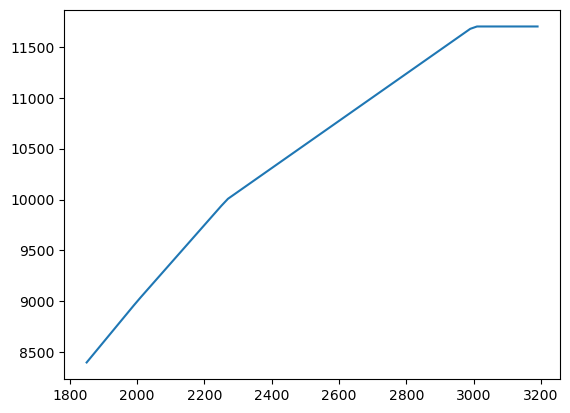

In [14]:
# parameter analysis for fabrication capacity from 1850 to 3200
param_lst = list(range(1850, 3201, 20))
optval_lst = list()
constr = mymodel.constraints()[0]
for b in param_lst:
    constr.SetUb(b)
    mymodel.Solve()
    optval_lst.append(mymodel.Objective().Value())
constr.SetUb(param_lst[0])
plt.plot(param_lst, optval_lst)

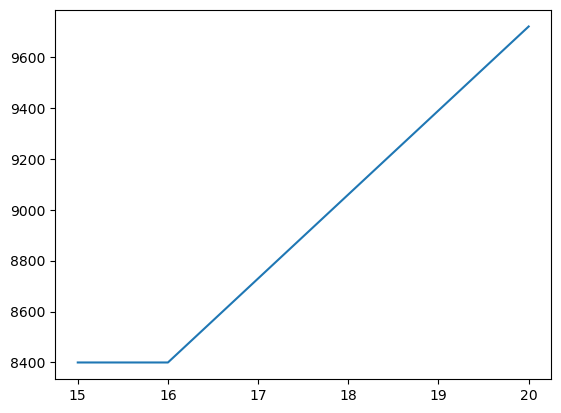

In [17]:
# parameter analysis of chair profit coefficient
param_lst = list(range(15,21))
optval_lst = list()
var = mymodel.variables()[0]
for c in param_lst:
    mymodel.Objective().SetCoefficient(var, c)
    mymodel.Solve()
    optval_lst.append(mymodel.Objective().Value())
mymodel.Objective().SetCoefficient(var, param_lst[0])
plt.plot(param_lst, optval_lst)